In [4]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
from mpl_toolkits.axes_grid.axislines import Subplot

from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv('stacked_bar_df.csv', index_col = 0)

In [3]:
df

,occurences_total,occurences_top_10,occurences_the_rest,percent_top_10,percent_the_rest,total_titles,percent_top_10_occurences,percent_the_rest_occurences,percent_total
Warner Brothers,95728777.0,26709158.0,69019619.0,0.279009,0.720991,1370.0,26709158.0,69019619.0,0.174144
Viacom,87798035.0,27271367.0,60526668.0,0.310615,0.689385,1652.0,27271367.0,60526668.0,0.159717
Disney,75103122.0,28916442.0,46186680.0,0.385023,0.614977,778.0,28916442.0,46186680.0,0.136623
NBC Universal,68876141.0,19508658.0,49367483.0,0.283243,0.716757,1293.0,19508658.0,49367483.0,0.125295
20th Century Fox,51925253.0,13700348.0,38224905.0,0.263847,0.736153,1066.0,13700348.0,38224905.0,0.094459
Sony,44516972.0,18678818.0,25838154.0,0.419589,0.580411,1262.0,18678818.0,25838154.0,0.080983
Netflix,43627019.0,20028479.0,23598540.0,0.459084,0.540916,613.0,20028479.0,23598540.0,0.079364
HBO,23040131.0,17322319.0,5717812.0,0.751832,0.248168,232.0,17322319.0,5717812.0,0.041913
Lionsgate,18706597.0,8768609.0,9937988.0,0.468744,0.531256,752.0,8768609.0,9937988.0,0.034030
AMC,12804811.0,10041246.0,2763565.0,0.784178,0.215822,330.0,10041246.0,2763565.0,0.023294


In [4]:
df = df.sort_values('total_titles', ascending = False)

In [16]:
top_10 = [x for x in df['percent_top_10']]
the_rest = [x for x in df['percent_the_rest']]
r = [x for x in range(0, len(list(df.index)), 1)]

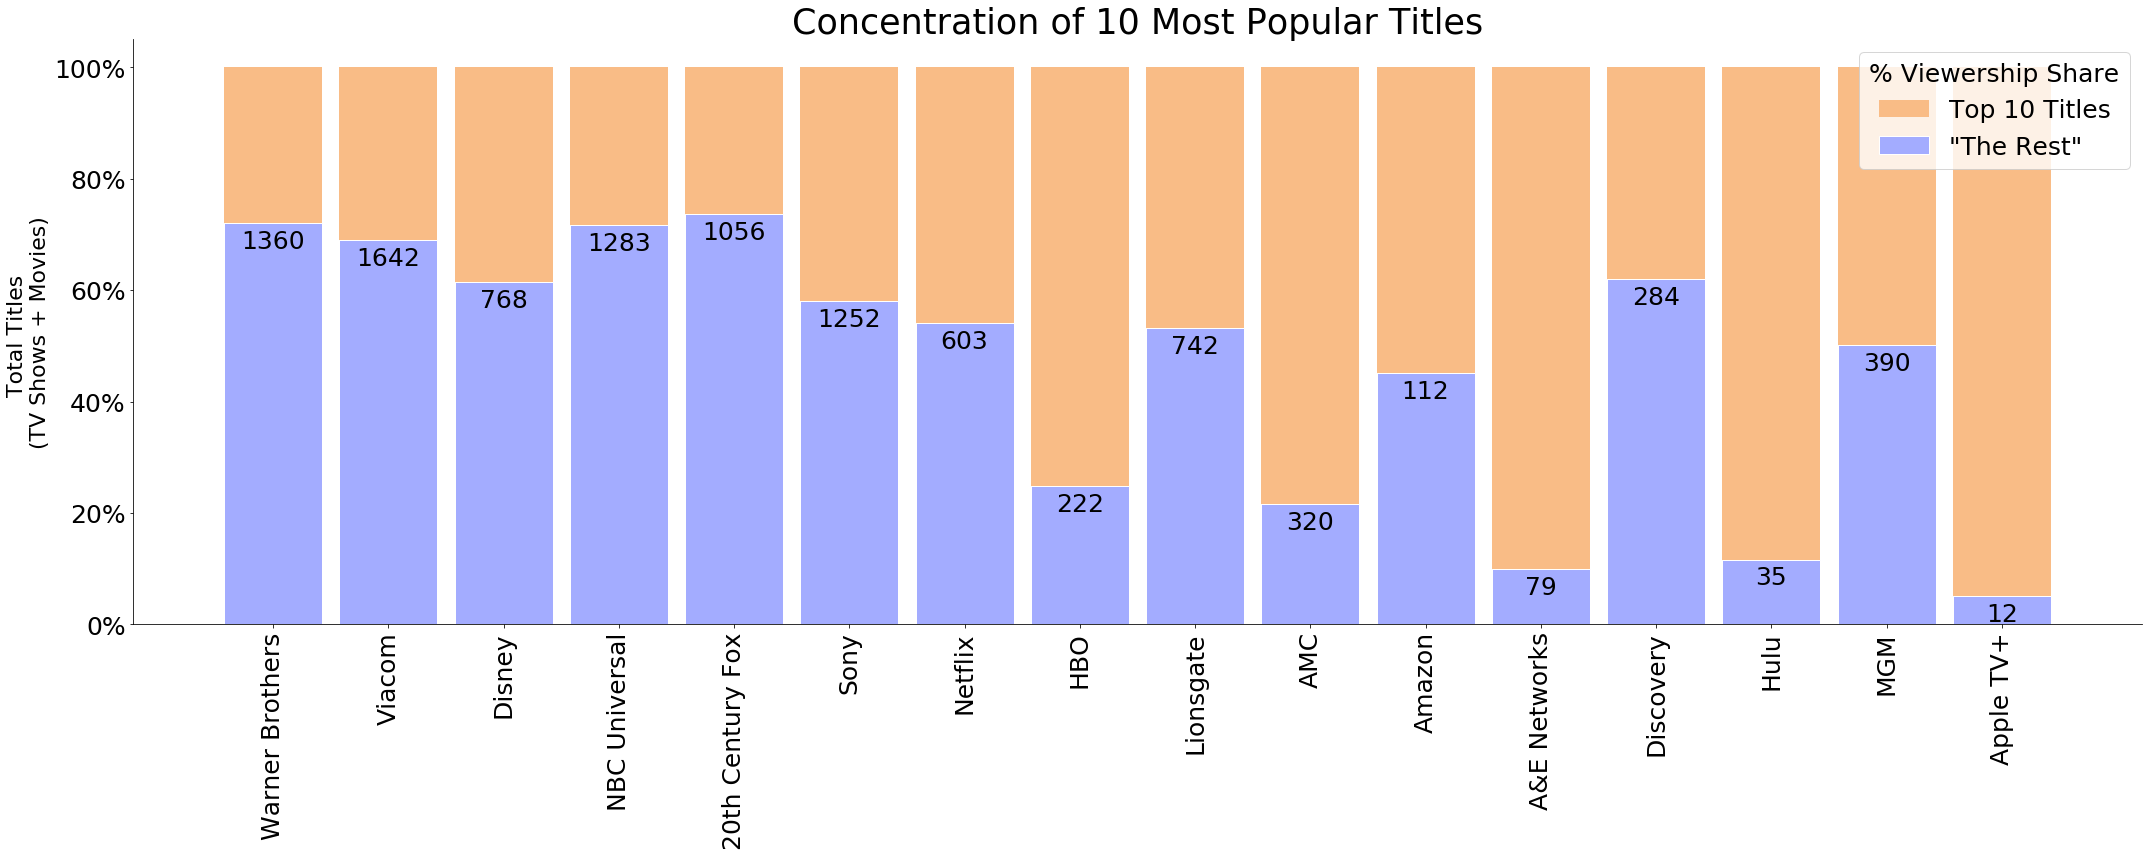

In [43]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

colors = ['#c2c2f0','#ffb3e6']
colors2 = ['#f9bc86', '#a3acff']

plt.figure(figsize = (30,12))

barWidth = 0.85
names = tuple((list(df.index)))

ax = plt.bar(r, top_10, bottom = the_rest, label = 'Top 10 Titles', width = barWidth, color = colors2[0])
ax2 = plt.bar(r, the_rest, label = '"The Rest"', edgecolor='white', width = barWidth, color = colors2[1])

for i, rect in enumerate(ax2.get_children()):
    plt.text(i, rect.get_height()-0.045, "%d" %(df["total_titles"].values[i]-10), 
             ha="center",
             fontsize=25)
    
# Custom x axis
plt.xticks(r, names, fontsize = 25, rotation = 90)
plt.yticks(np.arange(0,1.1, 0.2), ["%d%%"%(i*100) for i in np.arange(0,1.1, 0.2)],fontsize = 25)
plt.ylabel('Total Titles \n(TV Shows + Movies)', fontsize = 22)
plt.title('Concentration of 10 Most Popular Titles', fontsize=35)
plt.legend(fontsize = 25, title = '% Viewership Share', title_fontsize = '25') # prop={'size': 25},
plt.grid(False)
plt.subplots_adjust(left=0, bottom=0, right=.7, top=1, wspace=5, hspace=5)
plt.tight_layout()
plt.savefig('stacked_bar_total_titles.png')

0.7209913378502684